In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn import utils
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd
import numpy as np

In [2]:
# #read the sdf file of 10 predictable molecules
# ligands_996 =Chem.SDMolSupplier('/Users/blair/Desktop/input/RF_Ustatistic/wholemol/ndonor.sdf')
# #create the ecfp fingerprint
# #x is the input, 2 is the radius
# morgan_996=[AllChem.GetMorganFingerprintAsBitVect(x,2,nBits=1024) for x in ligands_996]
# efp_996=np.array(morgan_996)
# efp_996.shape

In [3]:
# # #save the ecfp in a csv file
# pd.DataFrame(efp_996).to_csv('/Users/blair/Desktop/input/RF_Ustatistic/wholemol/ndonor.csv')

In [4]:
# #define a function for normalizing in vertical order
# def col_normalize(X):
#     X1=np.matrix(X)
#     X_1=X1.transpose()
#     X_2=np.array(X_1)
#     X_3=preprocessing.normalize(X_2,norm="l2")
#     X_4=np.matrix(X_3)
#     X_5=X_4.transpose()
#     X_6=np.array(X_5)
#     return X_6

In [13]:
#read the file containing the ecfp and isomer(1 or 2) and normalize
input=pd.read_csv('input_996.csv')#Put address
efp_996=pd.read_csv('ecfp_996_1024.csv')
efp_996=np.array(efp_996)
Isomer=input[['Isomer']].copy()
X_996=np.concatenate((efp_996,Isomer),axis=1)
print(len(efp_996))
#Isomer_positive=input_positive[['Isomer']].copy()
#X_996=np.concatenate((efp_996,Isomer_positive),axis=1)
#X_785=col_normalize(X_785)
X_996.shape

996


(996, 1025)

In [14]:
#assign the Hammett constants to Y
Y_996=input_positive[['Hammett Constant']].copy()
Y_996=np.array(Y_996)

In [15]:
efp_ndonor=pd.read_csv('ecfp_ndonor.csv')
efp_ndonor=np.array(efp_ndonor)
X_ndonor=efp_ndonor
X_ndonor.shape

(10, 1025)

In [16]:
#create null list to record values later
MSE_boot=np.zeros((1000),dtype= float)
#Index= np.zeros((1000,662),dtype=int)
Y_prediction_train=np.zeros((996,1000),dtype=float)
#Y_prediction_test=np.zeros((334,1000),dtype=float)
Y_pred_all=np.zeros((996,1000),dtype=float)
Y_target_train=np.zeros((996,1000),dtype=float)
#Y_target_test=np.zeros((334,1000),dtype=float)
Y_prediction_ndonor=np.zeros((10,1000),dtype=float)
MSE_boot=np.zeros((1000),dtype= float)
print(Y_target_train[0].shape)

(1000,)


In [17]:
regr = RandomForestRegressor(n_estimators=1, max_depth=None, random_state=None,bootstrap=0)

In [18]:
for m in range(0,1000):
    #positive part
    index_996=np.random.choice(996, size=996, replace=1)
    X_train=X_996[index_996]
    Y_train=Y_996[index_996]
    X_test=np.delete(X_train,index_996,axis=0)
    Y_test=np.delete(Y_train,index_996,axis=0)
    #Y_positive_left.shape
    #negative part
#     index_negative=np.random.choice(183, size=183, replace=1)
#     X_121=X_183[index_negative]
#     Y_121=Y_negative[index_negative]
#     X_negative_left=np.delete(X_183,index_negative,axis=0)
#     Y_negative_left=np.delete(Y_negative,index_negative,axis=0)
#     #neutral part
#     index_zeros=np.random.choice(28, size=28, replace=1)
#     X_18=X_28[index_zeros]
#     Y_18=Y_zeros[index_zeros]
#     X_zeros_left=np.delete(X_28,index_zeros,axis=0)
#     Y_zeros_left=np.delete(Y_zeros,index_zeros,axis=0)
#     #target
#     X_662=np.concatenate((X_523,X_121,X_18),axis=0)
#     Y_662=np.concatenate((Y_523,Y_121,Y_18),axis=0)
#     X_662, Y_662 = shuffle(X_662, Y_662)
#     #X_662.shape
#     #print(Y_662.shape)
#     #left
#     X_left=np.concatenate((X_positive_left,X_negative_left,X_zeros_left),axis=0)
#     Y_left=np.concatenate((Y_positive_left,Y_negative_left,Y_zeros_left),axis=0)
#     Y_target_train[:,m]=Y_662.ravel()
#     #Y_target_test[:,m]=Y_left.ravel()
#     #Y_left.shape
#     #RF
    X_resample= X_train
    Y_resample= Y_train
    regr.fit(X_resample, Y_resample.ravel())
    Y_pred_train=regr.predict(X_resample)    #Fit RF on training set
    Y_pred_test=regr.predict(X_test)        #Fit RF on testing set
    Y_pred_all_each=regr.predict(X_996)     # Fit RF on complete database
    Y_pred_all[:,m]=Y_pred_all_each
    #Y_prediction_test[:,m]=Y_pred_left
    Y_prediction_train[:,m]=Y_pred_train
    #Y_pred_all=regr.predict(X_996)
    Y_pred_ndonor=regr.predict(X_ndonor)    # Fit RF on ndonor
    Y_prediction_ndonor[:,m]=Y_pred_ndonor
    MSE_train=mean_squared_error(Y_resample, Y_pred_train)
    MSE_test=mean_squared_error(Y_test, Y_pred_test)
    MSE_boot[m]=(MSE_train*0.368)+(0.632)*(MSE_test)

In [21]:
Y_prediction_mean=Y_pred_all.mean(axis=1)
Y_prediction_mean

array([ 2.84950000e-01,  2.40633333e-02,  7.58252381e-02, -3.87344333e-01,
       -3.79941429e-01,  3.68780000e-01,  4.63750000e-01,  3.01685000e-01,
        2.29280000e-01,  5.21070000e-01,  5.66090000e-01,  6.83240000e-01,
        7.29760000e-01,  3.19810000e-01,  3.45420000e-01,  2.77370000e-01,
        2.84260000e-01,  4.40340000e-01,  5.16770000e-01,  1.71760000e-01,
        1.02430000e-01,  3.94330000e-01,  4.21740000e-01,  4.04140000e-01,
        5.08740000e-01,  4.51220000e-01,  4.93880000e-01,  4.53270000e-01,
        5.12660000e-01,  3.20480000e-01,  3.63140000e-01,  4.37560000e-01,
        5.15500000e-01,  6.90200000e-02,  1.54400000e-02,  1.20190000e-01,
        1.20830000e-01, -5.74800000e-02, -9.28100000e-02, -5.75900000e-02,
       -1.20610000e-01, -5.93150000e-02,  2.12010000e-01, -1.26720000e-01,
        1.17250000e-01,  1.16470000e-01,  1.52320000e-01,  1.50050000e-01,
        3.32400000e-02, -8.33000000e-02,  1.24350000e-01,  1.20570000e-01,
        9.53300000e-02,  

In [22]:
Y_prediction_std=Y_pred_all.std(axis=1)
Y_prediction_std

array([0.02673944, 0.07353182, 0.06994868, 0.21060912, 0.1999332 ,
       0.07931653, 0.07816673, 0.13549017, 0.10713768, 0.11530895,
       0.13528715, 0.15382101, 0.16555284, 0.07062056, 0.09623109,
       0.08971055, 0.10062928, 0.06308474, 0.05954215, 0.10336683,
       0.12299104, 0.06607383, 0.10084826, 0.05623754, 0.04756062,
       0.0212488 , 0.0243997 , 0.04334982, 0.02469665, 0.06499361,
       0.09457875, 0.04840916, 0.05115613, 0.11160932, 0.1108188 ,
       0.04859695, 0.07981861, 0.127569  , 0.1089936 , 0.04693071,
       0.05963831, 0.06231738, 0.12162755, 0.06665464, 0.06899665,
       0.091349  , 0.06265954, 0.0910291 , 0.08191155, 0.10451655,
       0.03858727, 0.053252  , 0.04889265, 0.0753678 , 0.06765431,
       0.08493179, 0.17486519, 0.17442448, 0.06904707, 0.08279953,
       0.03184811, 0.03933882, 0.05250143, 0.07549271, 0.09649116,
       0.10514067, 0.07384664, 0.09345042, 0.13278373, 0.08401978,
       0.11152922, 0.09702247, 0.11497562, 0.03517737, 0.05411

In [23]:
sigma1=Y_prediction_std*2.03/(1000**0.5)
#sigma1.min()

In [24]:
MSE_all=mean_squared_error(Y_prediction_mean,Y_996)
MSE_all

0.0032335406439846196

In [25]:
#n_donor
Y_ndonor_mean=Y_prediction_ndonor.mean(axis=1)
Y_ndonor_mean

array([0.01281, 0.01604, 0.04489, 0.51958, 0.41579, 0.39335, 0.4562 ,
       0.47674, 0.43728, 0.36582])

In [26]:
Y_ndonor_std=Y_prediction_ndonor.std(axis=1)
Y_ndonor_std

array([0.10903854, 0.0997563 , 0.0623393 , 0.057268  , 0.18787489,
       0.21710246, 0.15736251, 0.12697548, 0.23798362, 0.17728093])

In [27]:
sigma2=Y_ndonor_std*2.03/(1000**0.5)
sigma2

array([0.00699965, 0.00640378, 0.00400182, 0.00367628, 0.01206049,
       0.01393673, 0.01010177, 0.00815109, 0.01527718, 0.01138041])

In [28]:
#pd.DataFrame(Y_prediction_mean).to_csv('/Users/blair/Desktop/input/RF_Ustatistic/wholemol/Y_prediction_mean.csv')#Put address

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 35}

matplotlib.rc('font', **font)
# filename = 'Y_all.csv'
# df = pd.read_csv(filename)
# #df1= pd.read_csv('FEC_10000.csv')
# df.columns#, df1.columns

#Plot parameters

xlow = -1.5
xhigh = 2.5


x=input_positive['Hammett Constant']
y=Y_prediction_mean
y_err=[Y_prediction_std,Y_prediction_std]

Text(-1.4, 1.9, 'Test set: 996 data points')

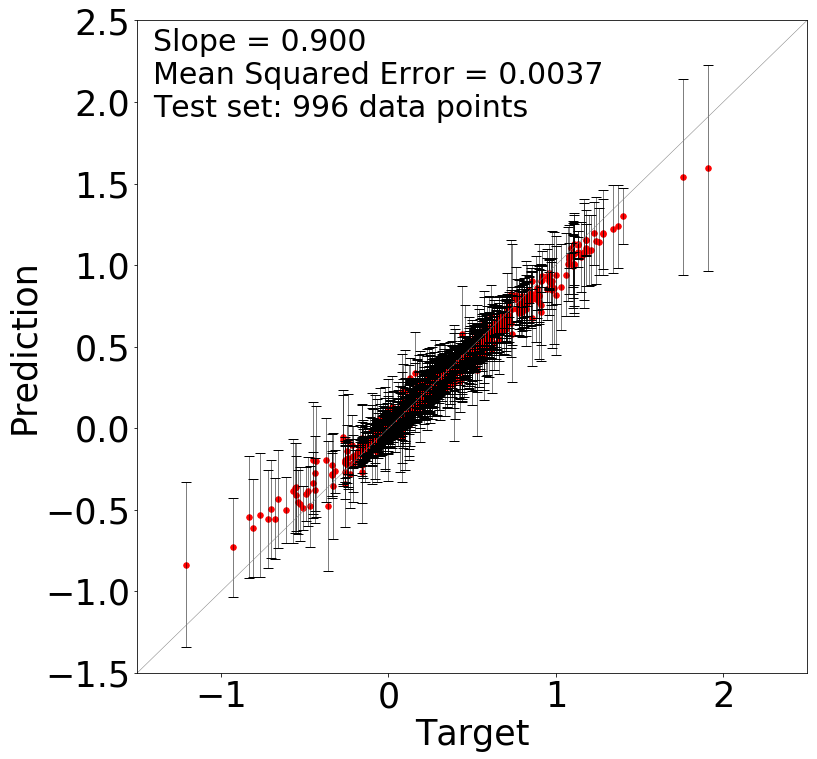

In [35]:
def scatplot(x_data, y_data, error_data, x_label, y_label, title):
    _, ax = plt.subplots(figsize=(12,12))
    # Draw bars, position them in the center of the tick mark on the x-axis
    ax.scatter(x_data, y_data, color = 'red',s=30)
    # Draw error bars to show standard deviation, set ls to 'none'
    # to remove line between points
    ax.errorbar(x_data, y_data,  
                yerr = error_data, 
                color = 'black', 
                ls = 'none', 
                lw = 0.5, capsize = 5)
    plt.xlim(xlow,xhigh)
    plt.ylim(xlow,xhigh)
    ax.plot([xlow, xhigh], [xlow, xhigh], color='gray', linestyle='-', linewidth=0.5)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title,fontsize=22.5)
    

# Call the function to create plot
scatplot(x_data = x, 
         y_data = y,
         error_data = y_err,
         x_label = 'Target',
         y_label = 'Prediction',
         title = '')

plt.annotate('Slope = 0.900', 
             xy=(-1.4, 2.3),  
             xycoords='data',
             textcoords='offset points',
             fontsize='30'
            # arrowprops=dict(arrowstyle="->")
            )
plt.annotate('Mean Squared Error = 0.0037', 
             xy=(-1.4, 2.1),  
             xycoords='data',
             textcoords='offset points',
             fontsize='30'
            # arrowprops=dict(arrowstyle="->")
            )
plt.annotate('Test set: 996 data points', 
             xy=(-1.4, 1.9),  
             xycoords='data',
             textcoords='offset points',
             fontsize='30'
            # arrowprops=dict(arrowstyle="->")
            )
        
#Plotting prediction for inputs without 
#plt.scatter(x1, y1, color = 'green',s=30)
#plt.errorbar(x1, y1,yerr = y1_err, color = 'k', ls = 'none', lw = 0.5, capsize = 5)
#plt.show()